In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        plt.plot(r[0], label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
%load_ext autoreload
%autoreload 2

# Chapter 8 Planning and Learning with Tabular Methods

### 8.1 Use random sample model to optimize Q

code see [DynaQ](./c08_dynaq.py#L12)

<img src="./avatar/c08_1.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 14.9 s, sys: 209 ms, total: 15.1 s
Wall time: 15.9 s
CPU times: user 1min 28s, sys: 1.33 s, total: 1min 30s
Wall time: 1min 33s
CPU times: user 2min 25s, sys: 1.63 s, total: 2min 27s
Wall time: 2min 43s
CPU times: user 1min 37s, sys: 1.57 s, total: 1min 38s
Wall time: 1min 45s
Trivial Model = Q-learning
1 [0.]
2 [1.e-05 1.e-05]
3 [0.00016 0.00015 0.00015]
4 [0.00105 0.00096 0.00191 0.00194]
5 [0.00398 0.00131 0.00211 0.00239 0.00057]
6 [0.00468 0.00607 0.00146 0.00246]
7 [0.01116 0.01104 0.01082]
8 [0.03596 0.0386 ]
9 [0.24369]


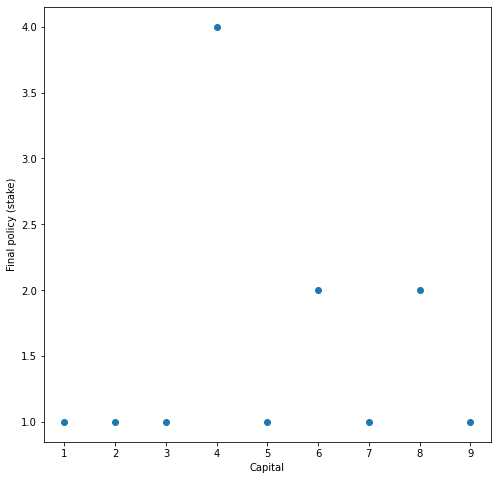

Trivial Model Q-learning with 5 steps
1 [1.e-05]
2 [0.00025 0.00053]
3 [0.00108 0.00025 0.00034]
4 [3.31e-03 3.00e-03 7.16e-03 2.00e-05]
5 [0.01043 0.00415 0.01036 0.00943 0.01037]
6 [0.01969 0.01641 0.01974 0.01229]
7 [0.03423 0.03479 0.03288]
8 [0.05264 0.04625]
9 [0.1218]


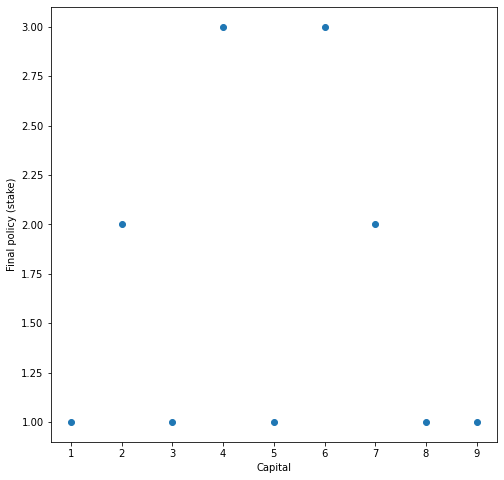

Weighted Model Q-learning with 5 steps
1 [1.e-05]
2 [1.0e-05 5.2e-04]
3 [5.5e-04 9.0e-05 6.0e-05]
4 [0.0004  0.00041 0.00122 0.00019]
5 [2.66e-03 2.00e-03 8.20e-04 2.00e-05 0.00e+00]
6 [0.0127  0.00283 0.00113 0.05098]
7 [0.08928 0.00629 0.00593]
8 [0.04502 0.12857]
9 [0.1604]


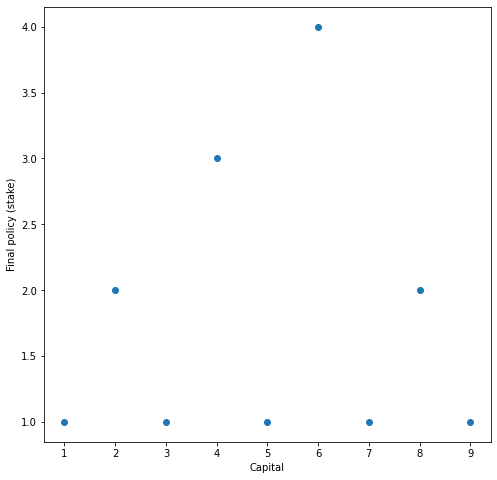

Time Model Q-learning with 5 steps
1 [6.e-05]
2 [0.00026 0.00035]
3 [0.00087 0.00078 0.0006 ]
4 [0.00145 0.00131 0.00139 0.00119]
5 [0.00293 0.00191 0.00208 0.02627 0.02696]
6 [0.07151 0.00427 0.00248 0.00265]
7 [0.0497  0.10009 0.00449]
8 [0.05753 0.21313]
9 [0.29768]


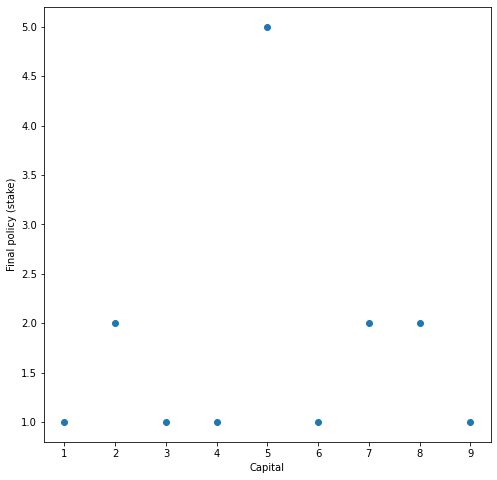

In [2]:
from c00_env import GamblerEnv
from c08_dynaq import DynaQ

env = GamblerEnv(N=10, p=0.1, include_terminate_state=False, seed=11)
mc = DynaQ(env)
%time q_1 = mc.fit_q(epochs=100000, model='Trivial', planning_steps=0)
%time q_2 = mc.fit_q(epochs=100000, model='Trivial', planning_steps=5)
%time q_3 = mc.fit_q(epochs=100000, model='Weighted', planning_steps=5)
%time q_4 = mc.fit_q(epochs=100000, model='Time', planning_steps=5)

print("Trivial Model = Q-learning")
for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())

print("Trivial Model Q-learning with 5 steps")
for k, v in q_2.items():
    print(k, v)
draw_policy(q_2, env.get_all_state_action())

print("Weighted Model Q-learning with 5 steps")
for k, v in q_3.items():
    print(k, v)
draw_policy(q_3, env.get_all_state_action())

print("Time Model Q-learning with 5 steps")
for k, v in q_4.items():
    print(k, v)
draw_policy(q_4, env.get_all_state_action())

In [3]:
for s, alist in mc.model.model.items():
    for a, info in alist.items():
        print(s, a, info)

1 0 ns=0, r=0, c=48671, t=309167
2 0 ns=1, r=0, c=21664, t=309136
2 1 ns=0, r=0, c=19612, t=309157
3 0 ns=2, r=0, c=13972, t=309156
3 1 ns=1, r=0, c=9198, t=309166
3 2 ns=0, r=0, c=12395, t=309099
4 0 ns=3, r=0, c=16546, t=309153
4 1 ns=2, r=0, c=5107, t=308702
4 2 ns=1, r=0, c=5651, t=309130
4 3 ns=0, r=0, c=8711, t=308666
5 0 ns=4, r=0, c=12471, t=308954
5 1 ns=3, r=0, c=4662, t=308943
5 2 ns=2, r=0, c=3445, t=308491
5 3 ns=1, r=0, c=5196, t=309005
5 4 ns=0, r=0, c=15885, t=309169
6 0 ns=5, r=0, c=20910, t=309168
6 1 ns=4, r=0, c=5261, t=308470
6 2 ns=3, r=0, c=3488, t=309165
6 3 ns=2, r=0, c=5432, t=308487
7 0 ns=6, r=0, c=12076, t=309119
7 1 ns=5, r=0, c=10294, t=309132
7 2 ns=4, r=0, c=6332, t=308884
8 0 ns=7, r=0, c=16326, t=308880
8 1 ns=6, r=0, c=11037, t=309164
9 0 ns=8, r=0, c=14827, t=309163


### 8.2 Use priority model to optimize Q

code see [PriorityDynaQ](./c08_dynaq.py#L85)

<img src="./avatar/c08_2.png" alt="mc for V" width="600" style='float:left'/>

In [ ]:
from c00_env import GamblerEnv
from c08_dynaq import PriorityDynaQ

env = GamblerEnv(N=10, p=0.1, include_terminate_state=False, seed=11)
mc = PriorityDynaQ(env)
%time q_5 = mc.fit_q(epochs=100000, planning_steps=5)

for k, v in q_5.items():
    print(k, v)
draw_policy(q_5, env.get_all_state_action())